##Lectura, Guardado y Visualización de Imágenes con PIL/Pillow

In [ ]:
from PIL import Image  # Importar la clase Image
import matplotlib.pyplot as plt  # Para visualización

##Cargar una Imagen

Opcion A: Cargar una Imagen desde Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
im = Image.open('')

Opción B: Descargar una imagen de ejemplo desde una URL:

In [ ]:
!wget = "https://upload.wikimedia.org/wikipedia/commons/e/ed/Ara_macao_-on_a_small_bicycle-8.jpg"  # Ejemplo público

--2025-04-16 00:12:10--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2025-04-16 00:12:10--  https://upload.wikimedia.org/wikipedia/commons/e/ed/Ara_macao_-on_a_small_bicycle-8.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 556913 (544K) [image/jpeg]
Saving to: ‘Ara_macao_-on_a_small_bicycle-8.jpg’

Ara_macao_-on_a_sma 100%[===================>] 543.86K  --.-KB/s    in 0.06s   

2025-04-16 00:12:11 (8.22 MB/s) - ‘Ara_macao_-on_a_small_bicycle-8.jpg’ saved [556913/556913]

FINISHED --2025-04-16 00:12:11--
Total wall clock time: 0.2s
Downloaded: 1 files, 544K in 0.06s (8.22 MB/s)


In [ ]:
im = Image.open('/content/Ara_macao_-on_a_small_bicycle-8.jpg')

##Propiedades Básicas de la Imagen

In [ ]:
print(f"""
Ancho: {im.width} píxeles
Alto: {im.height} píxeles
Modo: {im.mode} (RGB, L=Escala de grises, etc.)
Formato: {im.format}
Tipo de objeto: {type(im)}
""")


Ancho: 1000 píxeles
Alto: 663 píxeles
Modo: RGB (RGB, L=Escala de grises, etc.)
Formato: JPEG
Tipo de objeto: <class 'PIL.JpegImagePlugin.JpegImageFile'>



##Visualizar la Imagen

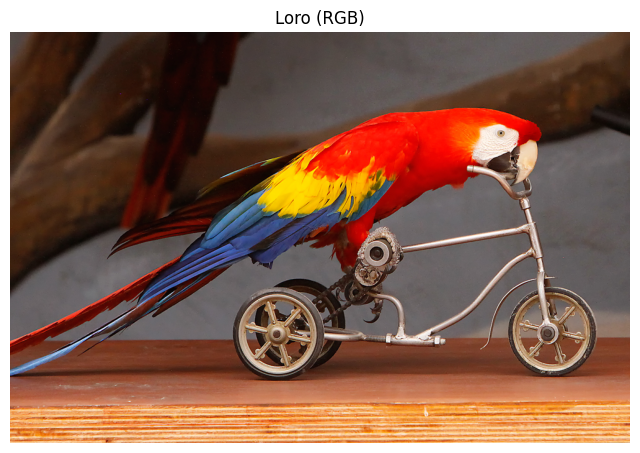

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(im)
plt.axis('off')  # Ocultar ejes
plt.title("Loro (RGB)")
plt.show()

Convertir a Escala de Grises y Guardar

In [ ]:
im_gris = im.convert('L')  # 'L' = Escala de grises

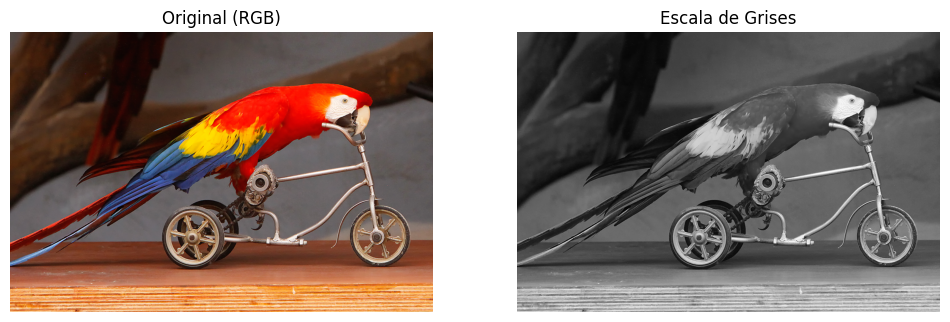

In [ ]:
# Mostrar ambas imágenes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(im); axes[0].set_title("Original (RGB)"); axes[0].axis('off')
axes[1].imshow(im_gris, cmap='gray'); axes[1].set_title("Escala de Grises"); axes[1].axis('off')
plt.show()

In [ ]:
# Guardar la nueva imagen
im_gris.save("parrot_gris.jpg")  # Se guarda en el sistema de archivos de Colab

¿Qué pasa si convertimos la imagen a modo '1' (binario: blanco y negro puro)?

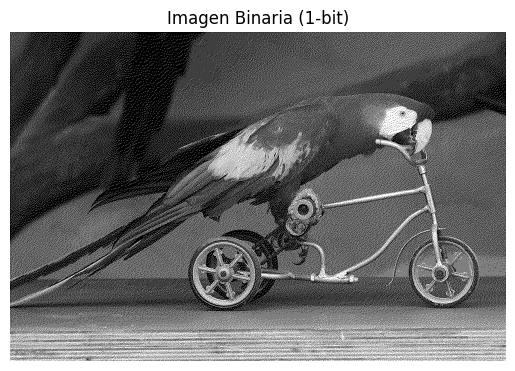

In [ ]:
im_binaria = im.convert('1')  # 1-bit
plt.imshow(im_binaria, cmap='gray')
plt.title("Imagen Binaria (1-bit)")
plt.axis('off')
plt.show()

Explicaciones Clave

    Image.open(): Carga la imagen en un objeto PIL.Image.

    Modos de imagen:

        'RGB': 3 canales (Red, Green, Blue).

        'L': Escala de grises (Luminance).

        '1': Binario (blanco/negro).

    Guardado: Usar im.save("nombre.ext") (soporta PNG, JPEG, etc.).

##Lectura, Guardado y Visualización de Imágenes con Matplotlib

###Importar Bibliotecas

En Google Colab, matplotlib y numpy ya están instalados:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

###Cargar una Imagen

In [ ]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/c/c8/Perito_Moreno_Glacier_2023.jpg'

--2025-04-16 00:23:52--  https://upload.wikimedia.org/wikipedia/commons/c/c8/Perito_Moreno_Glacier_2023.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34881082 (33M) [image/jpeg]
Saving to: ‘Perito_Moreno_Glacier_2023.jpg’

Perito_Moreno_Glaci 100%[===================>]  33.26M  28.0MB/s    in 1.2s    

2025-04-16 00:23:54 (28.0 MB/s) - ‘Perito_Moreno_Glacier_2023.jpg’ saved [34881082/34881082]



In [ ]:
im = mpimg.imread('/content/Perito_Moreno_Glacier_2023.jpg')

###Propiedades de la Imagen

Matplotlib carga la imagen como un array NumPy con valores normalizados (float32 entre 0 y 1):

In [ ]:
print(f"""
Dimensiones (alto, ancho, canales): {im.shape}
Tipo de dato: {im.dtype}
Tipo de objeto: {type(im)}
""")


Dimensiones (alto, ancho, canales): (5621, 13117, 3)
Tipo de dato: uint8
Tipo de objeto: <class 'numpy.ndarray'>



###Visualizar la Imagen

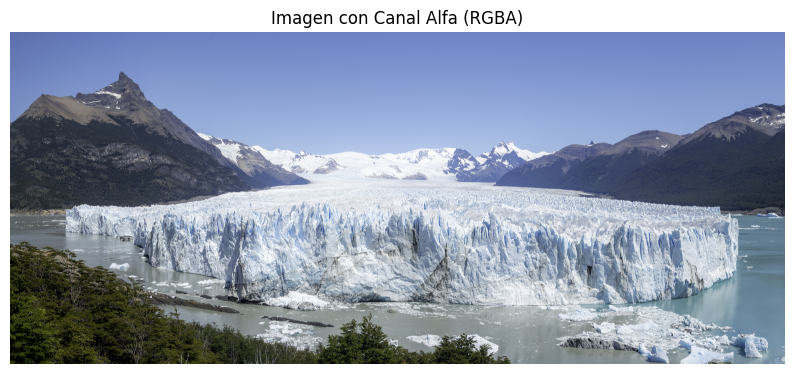

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(im)
plt.axis('off')  # Ocultar ejes
plt.title("Imagen con Canal Alfa (RGBA)")
plt.show()

###Convertir y Guardar la Imagen

Ejemplo: Convertir a escala de grises y guardar:

In [ ]:
# Convertir a grises (promedio de canales RGB, ignorando canal alfa)
im_gris = np.mean(im[:, :, :3], axis=2)  # Canales R+G+B / 3

In [ ]:
# Guardar con matplotlib (normalizar a 0-255 si es necesario)
plt.imsave("hill_gris.png", im_gris, cmap='gray')  # Guardar en Colab

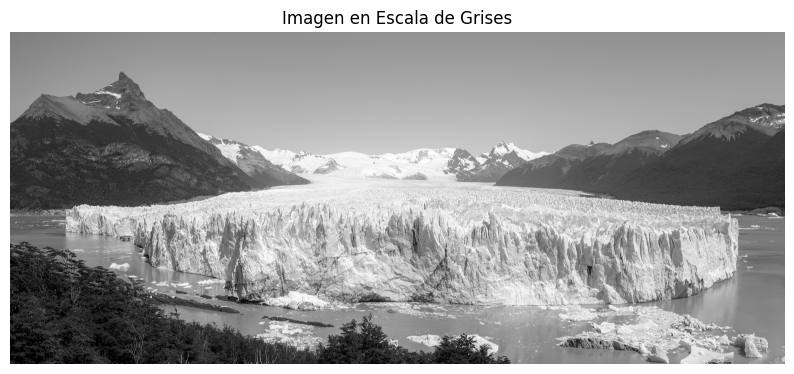

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(im_gris, cmap='gray')
plt.axis('off')  # Ocultar ejes
plt.title("Imagen en Escala de Grises")
plt.show()

###Interpolación en Visualización con matplotlib.imshow()

Explorar métodos de interpolación al visualizar imágenes pequeñas para entender cómo afectan la calidad aparente.

In [ ]:
!wget = 'https://upload.wikimedia.org/wikipedia/commons/9/9e/House_Sparrow_%28M%29_I_IMG_7881.jpg'

--2025-04-16 00:29:38--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2025-04-16 00:29:38--  https://upload.wikimedia.org/wikipedia/commons/9/9e/House_Sparrow_%28M%29_I_IMG_7881.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366703 (358K) [image/jpeg]
Saving to: ‘House_Sparrow_(M)_I_IMG_7881.jpg’

House_Sparrow_(M)_I 100%[===================>] 358.11K  --.-KB/s    in 0.06s   

2025-04-16 00:29:38 (6.35 MB/s) - ‘House_Sparrow_(M)_I_IMG_7881.jpg’ saved [366703/366703]

FINISHED --2025-04-16 00:29:38--
Total wall clock time: 0.2s
Downloaded: 1 files, 358K in 0.06s (6.35 MB/s)


###Verificar tamaño:

In [ ]:
im = mpimg.imread('/content/House_Sparrow_(M)_I_IMG_7881.jpg')

In [ ]:
print("Dimensiones de la imagen:", im.shape)  # Debería ser pequeña (ej. 50x50)

Dimensiones de la imagen: (594, 800, 3)


###Visualizar con Diferentes Métodos de Interpolación

Lista de métodos disponibles:

In [ ]:
metodos = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

###Código para comparar métodos:

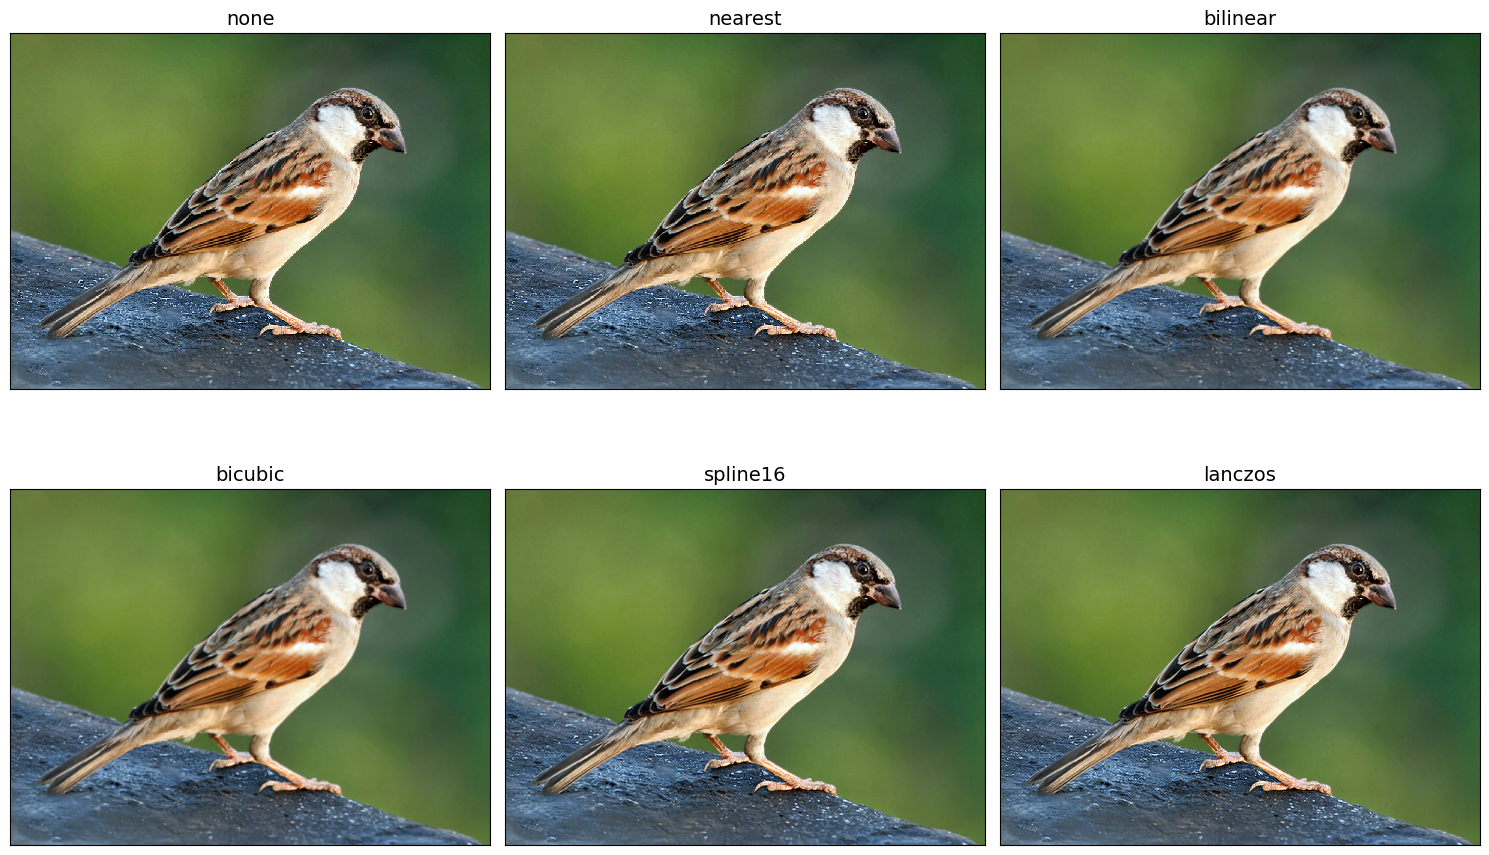

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for ax, metodo in zip(axes.flat, metodos):
    ax.imshow(im, interpolation=metodo)
    ax.set_title(metodo, fontsize=14)
plt.tight_layout()
plt.show()

| Método | Descripción | Uso Típico |
|---|---|---|
| 'none' | Sin interpolación (píxeles bloqueados). | Imágenes pixeladas. |
| 'nearest' | Interpolación por vecino más cercano (rápido, bajo costo computacional). | Gráficos simples. |
| 'bilinear' | Interpolación lineal en una cuadrícula 2x2. | Balance calidad-velocidad. |
| 'bicubic' | Interpolación cúbica en una cuadrícula 4x4 (mejor calidad que bilinear). | Fotografías. |
| 'spline16' | Interpolación spline de orden 16. | Alta calidad (lento). |
| 'lanczos' | Interpolación con filtro Lanczos (alta calidad, antialiasing). | Detalle fino (ej. astronomía). |

### Notas Clave

**Contexto:** La interpolación solo afecta la visualización, no modifica los datos originales.

**¿Cuándo usarla?:**

*   `'nearest'` para imágenes pixeladas (ej. arte retro).
*   `'bicubic'` o `'lanczos'` para ampliar imágenes pequeñas sin perder detalle aparente.